#### Import training and test dataset from .csv

In [1]:
import pandas as pd
import torch
import time

In [2]:
# Load training data
dataset_training_csv_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\training_dataset\\angles_ap_labelled_training.csv'
dataset_training_csv = pd.read_csv(dataset_training_csv_path)
dataset_training_csv

,PT,MT,TL/L,image_training_file,cobb_angle_training_file
0,6.2069,0.00000,1.261400,sunhl-1th-02-Jan-2017-162 A AP.jpg,sunhl-1th-02-Jan-2017-162 A AP.jpg.mat
1,23.8107,0.00000,0.851886,sunhl-1th-02-Jan-2017-162 B AP.jpg,sunhl-1th-02-Jan-2017-162 B AP.jpg.mat
2,21.1172,0.00000,0.000000,sunhl-1th-03-Jan-2017-163 A AP.jpg,sunhl-1th-03-Jan-2017-163 A AP.jpg.mat
3,10.8144,8.60388,0.000000,sunhl-1th-03-Jan-2017-163 B AP.jpg,sunhl-1th-03-Jan-2017-163 B AP.jpg.mat
4,18.1538,0.00000,1.748480,sunhl-1th-03-Jan-2017-164 A AP.jpg,sunhl-1th-03-Jan-2017-164 A AP.jpg.mat
...,...,...,...,...,...
476,12.5325,0.00000,11.484000,sunhl-1th-30-Dec-2016-159 A AP2.jpg,sunhl-1th-30-Dec-2016-159 A AP2.jpg.mat
477,11.0118,10.37890,0.000000,sunhl-1th-30-Dec-2016-159 B AP.jpg,sunhl-1th-30-Dec-2016-159 B AP.jpg.mat
478,5.6424,3.95370,2.821400,sunhl-1th-30-Dec-2016-159 C AP.jpg,sunhl-1th-30-Dec-2016-159 C AP.jpg.mat
479,16.3437,0.00000,0.000000,sunhl-1th-30-Dec-2016-160 A AP.jpg,sunhl-1th-30-Dec-2016-160 A AP.jpg.mat


In [3]:
# Load test data
dataset_test_csv_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\test_dataset\\angles_ap_labelled_test.csv'
dataset_test_csv = pd.read_csv(dataset_test_csv_path)
dataset_test_csv

,PT,MT,TL/L,image_test_file,cobb_angle_test_file
0,12.5578,0.00000,0.938543,sunhl-1th-01-Mar-2017-310 C AP.jpg,sunhl-1th-01-Mar-2017-310 C AP.jpg.mat
1,7.4942,1.00940,0.000000,sunhl-1th-01-Mar-2017-310 a ap.jpg,sunhl-1th-01-Mar-2017-310 a ap.jpg.mat
2,14.0048,0.00000,0.501069,sunhl-1th-01-Mar-2017-311 A AP.jpg,sunhl-1th-01-Mar-2017-311 A AP.jpg.mat
3,13.3802,0.00000,1.422200,sunhl-1th-01-Mar-2017-311 C AP.jpg,sunhl-1th-01-Mar-2017-311 C AP.jpg.mat
4,16.1798,1.23238,0.000000,sunhl-1th-01-Mar-2017-311 D AP.jpg,sunhl-1th-01-Mar-2017-311 D AP.jpg.mat
...,...,...,...,...,...
123,7.8933,0.00000,1.726000,sunhl-1th-28-Feb-2017-307 B AP.jpg,sunhl-1th-28-Feb-2017-307 B AP.jpg.mat
124,22.5108,0.00000,14.726900,sunhl-1th-28-Feb-2017-308 A AP.jpg,sunhl-1th-28-Feb-2017-308 A AP.jpg.mat
125,9.3330,0.73155,6.376700,sunhl-1th-28-Feb-2017-309 A AP.jpg,sunhl-1th-28-Feb-2017-309 A AP.jpg.mat
126,17.5526,8.90332,1.856840,sunhl-1th-28-Feb-2017-309 B AP.jpg,sunhl-1th-28-Feb-2017-309 B AP.jpg.mat


In [ ]:
# # check if image_training_file compatible with cobb_angle_training_file
# image_test_file_list = dataset_test_csv['image_test_file'].values.tolist()
# cobb_angle_test_file = dataset_test_csv['cobb_angle_test_file'].values.tolist()

# for i in range(len(image_test_file_list)):
#     cobb_angle_test_file[i] = cobb_angle_test_file[i][:-4]
#     if cobb_angle_test_file[i] != image_test_file_list[i]:
#         print('Incompatible file found')
#     if i+1 == len(image_test_file_list):
#         print('All files compatible and checked '+ str(i+1))


In [ ]:
# # check if image_test_file compatible with cobb_angle_test_file
# image_training_file_list = dataset_training_csv['image_training_file'].values.tolist()
# cobb_angle_training_file = dataset_training_csv['cobb_angle_training_file'].values.tolist()

# for i in range(len(image_training_file_list)):
#     cobb_angle_training_file[i] = cobb_angle_training_file[i][:-4]
#     if cobb_angle_training_file[i] != image_training_file_list[i]:
#         print('Incompatible file found')
#     if i+1 == len(image_training_file_list):
#         print('All files compatible and checked '+ str(i+1))


#### Prepare dictionary for training image data and its Cobb angle

In [5]:
training_dataset_dict = {} # good approach to maintain image - target_angle relation

# get train image list and its path
training_image_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\training_dataset\\sobel_img_training_data\\'

# get list of keys ie filepath
training_image_filepath_key = dataset_training_csv['image_training_file'].values.tolist()

# get list of values for dict
training_cobb_angle_values = dataset_training_csv[['PT', 'MT', 'TL/L']].values

# add to dictionary
for i in range(len(training_image_filepath_key)):
    training_dataset_dict[training_image_path + training_image_filepath_key[i]] = torch.tensor(training_cobb_angle_values[i], dtype=torch.float32)

#### Prepare dictionary for test image data and its Cobb angle

In [6]:
test_dataset_dict = {}
test_image_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\test_dataset\\sobel_img_test_data\\'
test_image_filepath_key = dataset_test_csv['image_test_file'].values.tolist()
test_cobb_angle_values = dataset_test_csv[['PT', 'MT', 'TL/L']].values

for i in range(len(test_image_filepath_key)):
    test_dataset_dict[test_image_path + test_image_filepath_key[i]] = torch.tensor(test_cobb_angle_values[i], dtype=torch.float32)

#### Perform training - validation splitting

In [7]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [8]:
# transform to list before inputting into splitting function
training_image_list = list(training_dataset_dict.keys())
training_true_cobb_angle_list = list(training_dataset_dict.values())

In [9]:
# Split the lists into training and validation sets
training_images, val_images, training_true_cobb_angle, val_true_cobb_angle = train_test_split(training_image_list, training_true_cobb_angle_list, test_size=0.2, random_state=42)

In [10]:
# Create dictionaries again for training and validation sets
training_input_dataset = {img: true_cobb_angle for img, true_cobb_angle in zip(training_images, training_true_cobb_angle)}
val_input_dataset = {img: true_cobb_angle for img, true_cobb_angle in zip(val_images, val_true_cobb_angle)}

#### CustomDataset

In [11]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from PIL import Image


In [12]:
# create dictionary dataset where key is image path and value is PT, MT, TL/L values
class CustomDataset(Dataset):
    def __init__(self, data_dict, transform_image):
        self.image_dict = data_dict
        self.image_paths = list(data_dict.keys())
        self.transform_image = transform_image
        
    def __getitem__(self, index):
        image_path = self.image_paths[index] # image_path is the key
        angles_value = self.image_dict[image_path]
        
        image = Image.open(image_path).convert('L')
        
        # transform image if required
        if self.transform_image is not None:
            image = self.transform_image(image)
        
        return image, image_path, angles_value
    
    def __len__(self):
        return len(self.image_dict)

In [13]:
transform_images = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.type(torch.float32))
])

In [14]:
transformed_training_dataset = CustomDataset(training_input_dataset, transform_images)
transformed_validation_dataset = CustomDataset(val_input_dataset, transform_images)

In [ ]:
# dataset = CustomDataset(dataset_dict, transform_images)

In [ ]:
# import matplotlib.pyplot as plt

# image, angles = dataset.__getitem__(10)
# plt.imshow(image.squeeze(), cmap='gray')
# print('Image shape ', image.shape)
# print('Angles ', angles)
# print('Angles shape ', angles.shape)

In [ ]:
# # Convert dictionary to separate lists for images and targets
# images = list()
# true_angles = list()

# # zipped = zip(images, true_angles)
# # for i in zipped:
# #     print(i)

In [ ]:
# image, image_name, angle = transformed_training_dataset.__getitem__(380)

In [ ]:
# import matplotlib.pyplot as plt

# plt.imshow(image.squeeze(), cmap='gray')
# print(angle)
# print('Image name ', image_name)

#### Create training and validation dataloaders

In [15]:
# Create a data loader for batching and shuffling the data
# batch_size = 32

training_loader = DataLoader(transformed_training_dataset, batch_size=32, shuffle=True)
validation_loader =  DataLoader(transformed_validation_dataset, batch_size=1, shuffle=False)

#### Deep Neural Network Architecture

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Model architecture
# neural network arch

class My_Regression_Model(nn.Module):
    def __init__(self, num_channel):
        super().__init__()
        
        # initialize 1st conv=>relu=>pool
        self.conv1 = nn.Conv2d(in_channels=num_channel, out_channels=50, kernel_size=(100,100))
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        
        # initialize 2nd conv=>relu=>pool
        self.conv2 = nn.Conv2d(in_channels=50, out_channels=1, kernel_size=(15,15))
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        
        # initialize 1st fc=>relu
        self.fc1 = nn.Linear(in_features=1*32*32, out_features=300)
        self.relu3 = nn.ReLU()
        
        # final fc
        self.fc2 = nn.Linear(in_features=300, out_features=3)
        
    def forward(self, x): # c, h, w
        x = self.conv1(x) # in -> (1, 255, 255) | out -> (50, 156, 156)
        x = self.relu1(x) 
        x = self.maxpool1(x) # in -> (50, 156, 156) | out -> (50, 78, 78)
        
        x = self.conv2(x) # in -> (50, 78, 78) | out -> (1, 64, 64)
        x = self.relu2(x) 
        x = self.maxpool2(x) # in -> (1, 64, 64) | out -> (1, 32, 32)
        
        # flatten
        x = torch.flatten(x,1)
        
        # fc1
        x = self.fc1(x)
        x = self.relu3(x)
        
        # fc2
        output = self.fc2(x)
        return output

NameError: name 'nn' is not defined

#### Viewing train_loader data

In [ ]:
# To take a look on train_loader data

for idx, (img, img_name, angle) in enumerate(training_loader):
    print('Batch ', idx)
    for i in range(len(img_name)): # batch_size
        print('Image name ', img_name[i])
        print('Angle ', angle[i])
        plt.imshow(img[i].squeeze(), cmap='gray')
        plt.show()
        # print('IMAGE SIZE ', img[i].squeeze())
        print('END OF DATA MEMBER___________________________________________')
    print('END OF BATCH_____________________________________________________\n\n')

#### Viewing validation_loader data

In [ ]:
# To take a look on validation_loader data

for idx, (img, img_name, angle) in enumerate(validation_loader):
    print('Batch ', idx)
    for i in range(len(img_name)): # batch_size
        print('Image name ', img_name[i])
        print('Angle ', angle[i])
        plt.imshow(img[i].squeeze(), cmap='gray')
        plt.show()
        # print('IMAGE SIZE ', img[i].squeeze())
        print('END OF DATA MEMBER___________________________________________')
    print('END OF BATCH_____________________________________________________\n\n')

#### Training Process

In [28]:
# Define the input channels
input_channels = 1  # Assuming L images

# set up model instance
model = My_Regression_Model(input_channels)

In [29]:
# Move the model to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

My_Regression_Model(
  (conv1): Conv2d(1, 50, kernel_size=(100, 100), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(50, 1, kernel_size=(15, 15), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=300, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=300, out_features=3, bias=True)
)

In [30]:
# set up optimizer and loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

In [31]:
# to save validation loss and training loss
loss_list_data = []

# to keep track lowest loss
lowest_training_loss = float('inf')
lowest_val_loss = float('inf')

start_time = time.time()

# training loop with validation
for epoch in range(num_epochs):
    
    # training phase
    model.train()                                       # allow weights and biases adjusting
    training_loss = 0.0
    for image_input, _, target_angle in training_loader:
        # move input and output to cuda if available
        image_input = image_input.to(device)
        target_angle = target_angle.to(device)
        optimizer.zero_grad()                           # clearing previous loss derivative
        predicted = model(image_input)                  # forward 
        loss = criterion(predicted, target_angle)       # computing loss
        loss.backward()                                 # computing loss derivative with respect of weights and biases
        optimizer.step()                                # adjusting weights and biases
        training_loss += loss.item()                    # summing all batches losses for averaging
    training_loss /= len(training_loader)
        
    # validation phase in at end of every epoch
    model.eval()                                        # block weights and biases adjsuting
    val_loss = 0.0
    with torch.no_grad():                                # remove all computed derivatives
        for image_input, _, target_angle in validation_loader:
            # move input and output to cuda if available
            image_input = image_input.to(device)
            target_angle = target_angle.to(device)
            predicted = model(image_input)
            # for averaging validation loss
            val_loss += criterion(predicted, target_angle).item()
    
    val_loss /= len(validation_loader) # calculating average validation loss
    
    # Print the training and validation loss for each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_loss}, Validation Loss: {val_loss}")    
    
    # for graphing evaluation later
    loss_list_data.append((epoch+1, training_loss, val_loss))
    
    # save best model with lowest loss of any two (training_loss or val_loss)
    if lowest_training_loss > training_loss:
        lowest_training_loss = training_loss
        best_model = model.state_dict()
        print('Lowest training_loss found')
    if lowest_val_loss > val_loss:
        lowest_val_loss = val_loss
        best_model = model.state_dict()
        print('Lowest val_loss found')

end_time = time.time()

# save the best model found
path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\saved_models\\sobel_model\\'
torch.save(best_model, path + 'best_sobel_model.pt')

Epoch [1/100], Training Loss: 67.55608304341634, Validation Loss: 71.3453916471029
Lowest training_loss found
Lowest val_loss found
Epoch [2/100], Training Loss: 66.59150791168213, Validation Loss: 70.23932228874915
Lowest training_loss found
Lowest val_loss found
Epoch [3/100], Training Loss: 65.37229442596436, Validation Loss: 68.74780740442964
Lowest training_loss found
Lowest val_loss found
Epoch [4/100], Training Loss: 63.722038904825844, Validation Loss: 66.74740617299817
Lowest training_loss found
Lowest val_loss found
Epoch [5/100], Training Loss: 61.563984870910645, Validation Loss: 64.20683365261432
Lowest training_loss found
Lowest val_loss found
Epoch [6/100], Training Loss: 58.88939698537191, Validation Loss: 61.15794208123512
Lowest training_loss found
Lowest val_loss found
Epoch [7/100], Training Loss: 55.78281784057617, Validation Loss: 57.65487110983465
Lowest training_loss found
Lowest val_loss found
Epoch [8/100], Training Loss: 52.26909510294596, Validation Loss: 53

#### Compute training time

In [32]:
training_time = end_time - start_time
print("Training time elapsed: " + str(training_time) + " seconds")

Training time elapsed: 1942.1318457126617 seconds


#### Save model

In [33]:
# save model 
path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\saved_models\\sobel_model\\'
torch.save(model.state_dict(), path + 'sobel.pt')

#### Testing model

In [34]:
# loading test dataset
transformed_test_dataset = CustomDataset(test_dataset_dict, transform_images)

In [ ]:
# img, img_name, angle = transformed_test_dataset.__getitem__(2)
# plt.imshow(img.squeeze(), cmap='gray')
# plt.show()
# print(img_name)
# print(angle)

In [35]:
# create test_loader
test_loader = DataLoader(transformed_test_dataset, batch_size=32, shuffle=False)

In [57]:
test_loss = 0.0
model.eval()
with torch.no_grad():
    for image_input, _, target_angle in test_loader:
        # move input and output to cuda if available
        image_input = image_input.to(device)
        target_angle = target_angle.to(device)
        predicted = model(image_input)
        test_loss += criterion(predicted, target_angle).item()

test_loss /= len(test_loader) # calculating average test_loss
print(f"Final model testing loss: {test_loss}")

Final model testing loss: 9.60238265991211


In [1]:
# load best model
the_best_model = My_Regression_Model(input_channels)
the_best_model.load_state_dict(torch.load(path + 'best_sobel_model.pt')) # load the saved best model weights & biases dictionary
the_best_model = the_best_model.to(device)
# testing phase using best model
test_loss = 0.0
the_best_model.eval()
with torch.no_grad():
    for image_input, _, target_angle in test_loader:
        # move input and output to cuda if available
        image_input = image_input.to(device)
        target_angle = target_angle.to(device)
        predicted = the_best_model(image_input)
        test_loss += criterion(predicted, target_angle).item()

test_loss /= len(test_loader) # calculating average test_loss
print(f"Best model testing loss: {test_loss}")

NameError: name 'My_Regression_Model' is not defined

### Evaluation (Loss vs Epoch)

In [41]:
epoch_list = []
training_loss_list = []
validation_loss_list = []

for i in range(len(loss_list_data)):
    epoch_list.append(loss_list_data[i][0])
    training_loss_list.append(loss_list_data[i][1])
    validation_loss_list.append(loss_list_data[i][2])

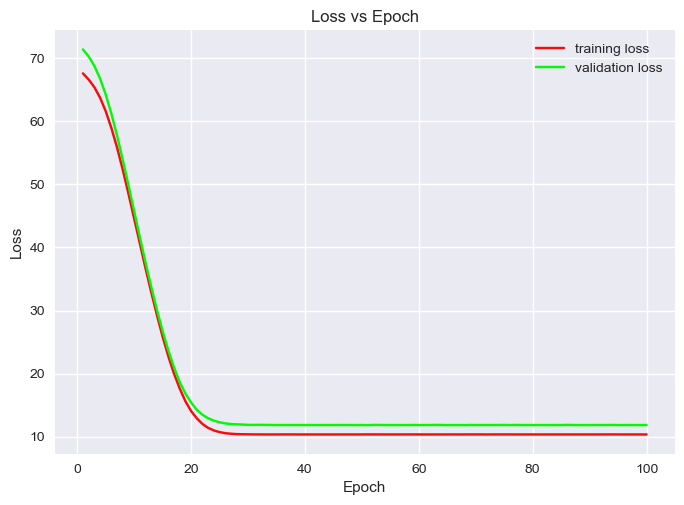

In [50]:
# plot training loss vs epoch
plt.plot(epoch_list, training_loss_list, color='#f70c0c', label='training loss')
plt.plot(epoch_list, validation_loss_list, color='#00fa08', label='validation loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Test data evaluation plot (Predicted vs Ground Truth) for every PT, MT and TL/L

In [70]:
# best model

best_sobel_model = My_Regression_Model(input_channels)
best_sobel_model.load_state_dict(torch.load(path + 'best_sobel_model.pt'))
best_sobel_model = best_sobel_model.to(device) # move to cuda

In [98]:
predicted_list = []
target_angle_list = []

best_sobel_model.eval()
with torch.no_grad():
    for image_input, _, target_angle in test_loader:
        image_input = image_input.to(device)
        target_angle = target_angle.to(device)
        predicted = best_sobel_model(image_input)
        predicted_list.append(predicted.cpu().numpy())
        target_angle_list.append(target_angle.cpu().numpy())

In [114]:
# remove batch_class effect
flattened_list_predicted = [element for sublist in predicted_list for element in sublist]
len(flattened_list_predicted)

128

In [115]:
flattened_list_target_angle = [element for sublist in target_angle_list for element in sublist]
len(flattened_list_target_angle)

128

In [121]:
# combined PT (predicted, true_value)

PT_value = [(PT_predicted, PT_true) for (PT_predicted,*_),(PT_true,*_) in zip(flattened_list_predicted,flattened_list_target_angle)]
# PT_value

In [127]:
# combined MT (predicted, true_value)
MT_value = [(MT_predicted, MT_true) for (_,MT_predicted,_), (_,MT_true,_) in zip(flattened_list_predicted,flattened_list_target_angle)]
# MT_value

In [135]:
# combined TL/L (predicted, true_value)
TL_value = [(TL_predicted, TL_true) for (*_, TL_predicted), (*_, TL_true) in zip(flattened_list_predicted, flattened_list_target_angle)]
# TL_value

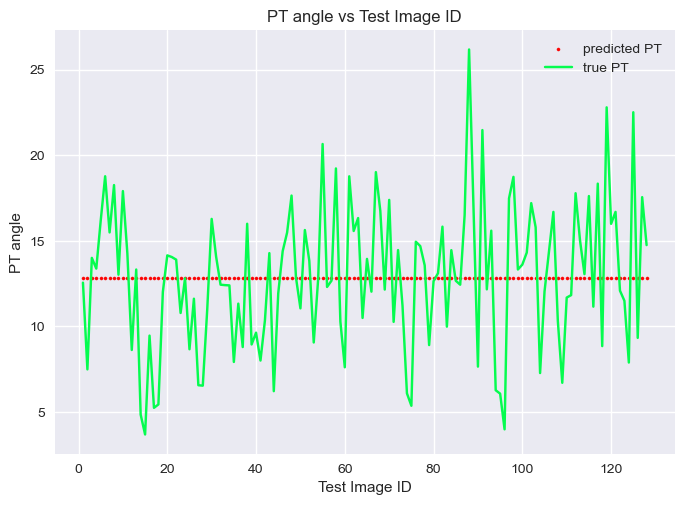

In [154]:
# plot PT value

x = [img_idx for img_idx in range(1, len(PT_value)+1)]
predicted_pt = [item[0] for item in PT_value]
true_pt = [item[1] for item in PT_value]

plt.scatter(x, predicted_pt, label='predicted PT', color='#fc0505', s=5)
plt.plot(x, true_pt, label='true PT', color='#05fc4f')
plt.xlabel('Test Image ID')
plt.ylabel('PT angle')
plt.title('PT angle vs Test Image ID')
plt.legend()
plt.show()

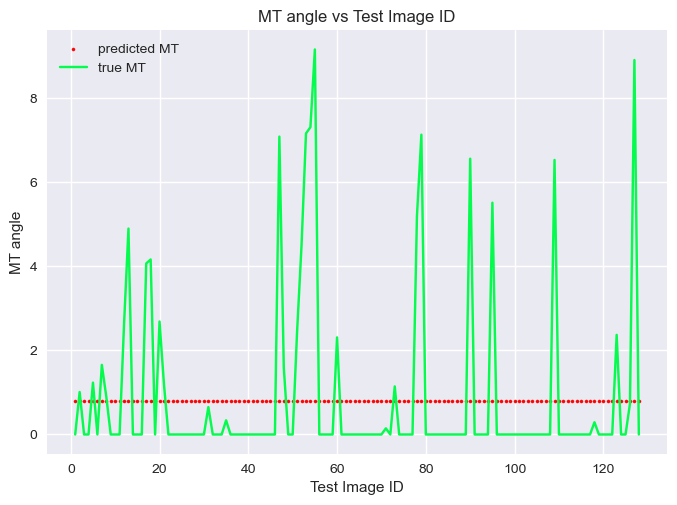

In [153]:
# plot MT value
x = [img_idx for img_idx in range(1, len(MT_value)+1)]
predicted_mt = [item[0] for item in MT_value]
true_mt = [item[1] for item in MT_value]

plt.scatter(x, predicted_mt, label='predicted MT', color='#fc0505', s=5)
plt.plot(x, true_mt, label='true MT', color='#05fc4f')
plt.xlabel('Test Image ID')
plt.ylabel('MT angle')
plt.title('MT angle vs Test Image ID')
plt.legend()
plt.show()

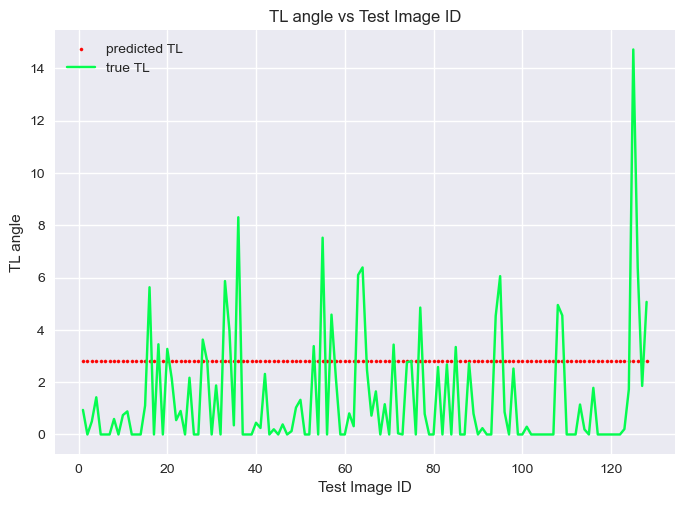

In [152]:
# plot TL value
x = [img_idx for img_idx in range(1, len(TL_value)+1)]
predicted_tl = [item[0] for item in TL_value]
true_tl = [item[1] for item in TL_value]

plt.scatter(x, predicted_tl, label='predicted TL', color='#fc0505', s=5)
plt.plot(x, true_tl, label='true TL', color='#05fc4f')
plt.xlabel('Test Image ID')
plt.ylabel('TL angle')
plt.title('TL angle vs Test Image ID')
plt.legend()
plt.show()